# Inicializacao

In [169]:
# inicialização
import numpy as np
import pandas as pd
import sympy as sp
import scipy.io as sc 
import scipy.signal as signal
from sympy import symbols, pprint
import matplotlib.pyplot as plt
from structureSelector import *
from methods.utils.utilities import *
import plotly.express as px

J = 4.948e-6   #kgm²
R = 0.0132  #m
m = 0.071   #kg
g = 9.81    #m/s^2
r = 0.0118  #m
h = 0.035   #m

fb = 0.0362 #N*d/m
vt = 0.008  #m/s
a0 = -0.16  #deg

a = (J/(r**2) + m)

a1 = - m * (h+r) / a
a2 = -(J/r) / a
a3 = m * g / a
a4 = m / a


# Entrada 1

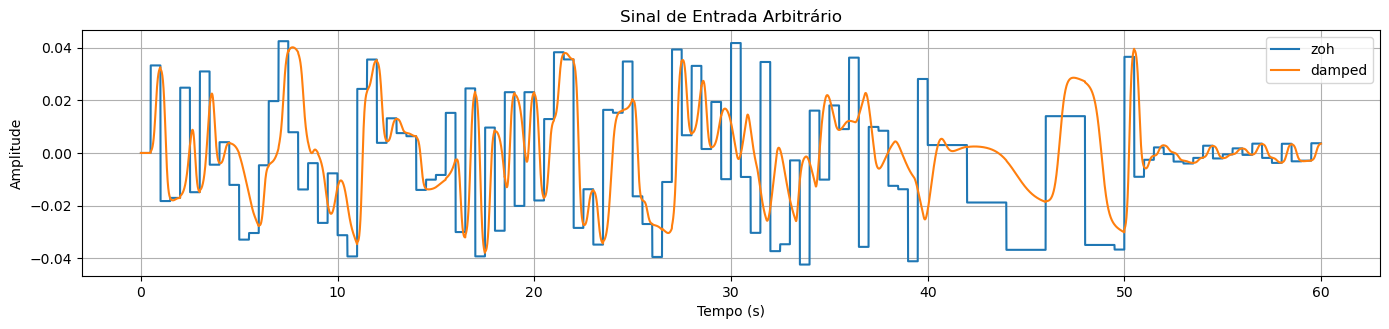

In [36]:
np.random.seed(48)
dt = 0.01

size = 60
step = 0.5
div = int(size // step)

t = np.arange(0, size, dt)
stairs = np.zeros(t.shape)
un = np.zeros(t.shape)

urange = (np.pi / 180) * 2.43
mag = np.random.uniform(-urange, urange, div)
mag[0] = 0
rt = int(t.shape[0] / div)

vel = np.ones(mag.shape) * 16
vel[4] = 8
vel[6] = 10
vel[9] = 6
vel[10] = 6
vel[13] = 6
vel[15] = 4
mag[14] = (np.pi / 180) * 2.43

vel[18:20] = 10
vel[19] = 10

for i in range(1, 20):
    curve = 1/(1+np.exp(-vel[i]*t+4))
    stairs[rt*i:rt*(i+1)] = mag[i]
    un[rt*i:] += (mag[i] - mag[i-1]) * curve[:curve.shape[0]-rt*i]

mag[22], mag[23] = -mag[23], -mag[22]
vel[20:22] = 8
vel[29:32] = 6
vel[[36,38]] = 8
vel[47] = 10
vel[48:50] = 6
vel[52] = 5
vel[53] = 6
vel[[56,58]] = 10
vel[59] = 6

for i in range(20, 60):
    curve = 1/(1+np.exp(-vel[i]*t+4))
    stairs[rt*i:rt*(i+1)] = mag[i]
    un[rt*i:] += (mag[i] - mag[i-1]) * curve[:curve.shape[0]-rt*i]

vel[60:100] = 3
vel[61:63] = 5
vel[66] = 10
vel[67] = 2
vel[68] = 6
for i in range(60, 80):
    curve = (1 - np.exp(-vel[i]*(t-0.3)) - vel[i]*(t-0.3)*np.exp(-vel[i]*(t-0.3))) * (t >= 0.3)
    stairs[rt*i:rt*(i+1)] = mag[i]
    un[rt*i:] += (mag[i] - mag[i-1]) * curve[:curve.shape[0]-rt*i]

mag[76] = mag[79]
mag[80] = 0.003
vel[80] = 6
vel[84] = 2
vel[88] = 1
vel[92] = 7
vel[96] = 6
mag[92] = (np.pi / 180) * 0.8
mag[96] = -(np.pi / 180) * 2.0
for i in range(0, 5):
    j = 80 + i * 4
    curve = 1/(1+np.exp(-vel[j]*t+5))
    stairs[rt*j:rt*(j+4)] = mag[j]
    un[rt*j:] += (mag[j] - mag[j-4]) * curve[:curve.shape[0]-rt*j]

mag[98] = -(np.pi / 180) * 2.0
mag[99] = -(np.pi / 180) * 2.1
mag[111] = (np.pi / 180) * 1
mag[116] = (np.pi / 180) * 2
mag[102:] = 0.1 * mag[102:]
for i in range(99, 120):
    curve = 1/(1+np.exp(-vel[i]*t+4))
    stairs[rt*i:rt*(i+1)] = mag[i]
    un[rt*i:] += (mag[i] - mag[i-1]) * curve[:curve.shape[0]-rt*i]


plt.figure(figsize=(14, 6));plt.subplot(2, 1, 1)
plt.plot(t, stairs, label="zoh");plt.plot(t, un, label="damped")
plt.title("Sinal de Entrada Arbitrário");plt.xlabel("Tempo (s)");plt.ylabel("Amplitude")
plt.grid(True);plt.legend();plt.tight_layout();plt.show()

## simul

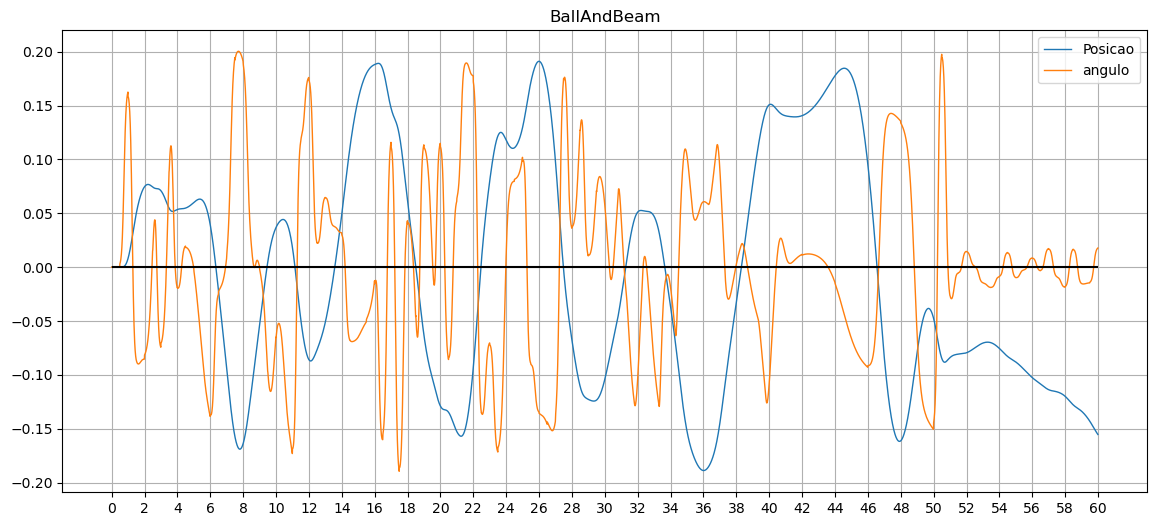

In [37]:
u = un.copy();du = np.zeros(t.shape);d2u = np.zeros(t.shape)

du[1:] = (u[1:] - u[:-1]) / dt;d2u[2:] = (du[2:] - du[1:-1]) / dt

s = np.zeros(t.shape);ds = np.zeros(t.shape);d2s = np.zeros(t.shape)

for i in range(1, t.shape[0]):
    um = (u[i-1] + u[i]) / 2
    dum = (um - u[i-1]) / dt
    k1 = m * s[i-1] * (du[i-1]**2) / a + m * g * np.sin(u[i-1]) / a
    k2 = m * (s[i-1] + (dt/2) * k1) * (dum**2) / a + m * g * np.sin(um) / a
    k3 = m * (s[i-1] + (dt/2) * k2) * (dum**2) / a + m * g * np.sin(um) / a
    k4 = m * (s[i-1] + dt * k3) * (du[i]**2) / a + m * g * np.sin(u[i]) / a

    ds[i] = ds[i-1] + (dt/6) * (k1 + 2*k2 + 2*k3 + k4)
    s[i] = np.clip(s[i-1] + ds[i] * dt, -0.2, 0.20)
    if np.abs(s[i]) >= 0.2:
        ds[i] = 0
        
begin = int(0 * 1e+2)
end = int(60 * 1e+2)
plt.figure(figsize=(14, 6))
plt.title("BallAndBeam")
plt.plot(t[begin:end], s[begin:end], linewidth=1, label="Posicao")
plt.plot(t[begin:end], un[begin:end] * 5, linewidth=1, label="angulo")
#plt.plot(t[begin:end], stairs[begin:end] * 5, linewidth=1, label="angulo")
plt.hlines(0, begin // 100, end // 100, colors='black')
plt.xticks(np.arange(begin // 100, end // 100 + 1, 2))
plt.legend();plt.grid();plt.show()

In [38]:
data = np.vstack((un[::1], s[::1], ds[::1], t[::1])).T
print(un.shape, s.shape, data.shape)
np.savetxt("data/ballBeamTeste1.csv", data, delimiter=",", fmt="%.6f", header="input,output,derivada,time", comments="")

(6000,) (6000,) (6000, 4)


# Entrada 2

In [211]:
np.random.seed(48)
dt = 0.01

size = 60
step = 0.5
div = int(size // step)
t = np.arange(0, size, dt)
stairs = np.zeros(t.shape)
uVal = np.zeros(t.shape)

urange = (np.pi / 180) * 2.43
mag = np.random.uniform(-urange, urange, div)
mag[0] = 0
rt = int(t.shape[0] / div)

vel = np.ones(mag.shape) * 12
vel[1] = 16
vel[4] = 6
vel[14] = 5
vel[[9,10,16,19,21]] = 9

v = [17,18,19,20]
mag[v] = -mag[v]
mag[28] = -0.00205
mag[29:31] = 0
mag[30:50] = mag[30:50]/5
for i in range(1, 50):
    curve = 1/(1+np.exp(-vel[i]*t+4))
    stairs[rt*i:rt*(i+1)] = mag[i]
    uVal[rt*i:] += (mag[i] - mag[i-1]) * curve[:curve.shape[0]-rt*i]
fd = [50,54,58,62,66]
mag[fd] = [-0.005,0.01,-0.017,0.002,0]
vel[fd] = [6,4,3,5,6]
mag[46] = mag[49]
for i in range(0, 5):
    j = 50 + i * 4
    curve = 1/(1+np.exp(-vel[j]*t+5))
    stairs[rt*j:rt*(j+4)] = mag[j]
    uVal[rt*j:] += (mag[j] - mag[j-4]) * curve[:curve.shape[0]-rt*j]
    
vel[70:] = 3
#mag[72] = mag[72] * 0.8
vel[[70, 72]] = 1.5

for i in range(70, div):
    curve = (1 - np.exp(-vel[i]*(t-0.3)) - vel[i]*(t-0.3)*np.exp(-vel[i]*(t-0.3))) * (t >= 0.3)
    stairs[rt*i:rt*(i+1)] = mag[i]
    uVal[rt*i:] += (mag[i] - mag[i-1]) * curve[:curve.shape[0]-rt*i]
'''
plt.figure(figsize=(14, 6));plt.subplot(2, 1, 1)
plt.plot(t, stairs, label="zoh");plt.plot(t, uVal, label="damped")
plt.title("Sinal de Entrada Arbitrário");plt.xlabel("Tempo (s)");plt.ylabel("Amplitude")
plt.grid(True);plt.legend();plt.tight_layout();plt.show()'''

'\nplt.figure(figsize=(14, 6));plt.subplot(2, 1, 1)\nplt.plot(t, stairs, label="zoh");plt.plot(t, uVal, label="damped")\nplt.title("Sinal de Entrada Arbitrário");plt.xlabel("Tempo (s)");plt.ylabel("Amplitude")\nplt.grid(True);plt.legend();plt.tight_layout();plt.show()'

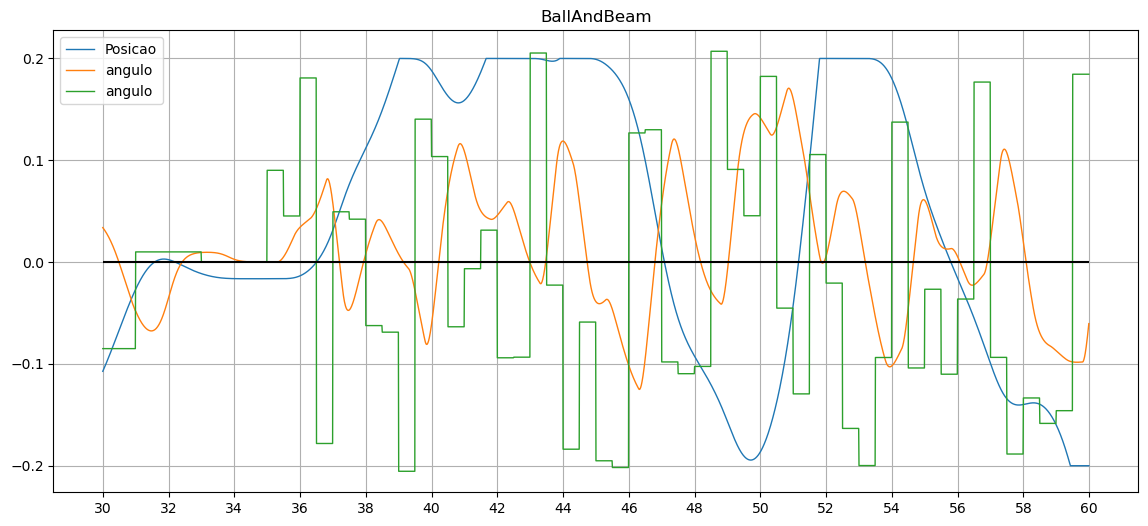

In [214]:
u = uVal.copy();du = np.zeros(t.shape);d2u = np.zeros(t.shape)

du[1:] = (u[1:] - u[:-1]) / dt;d2u[2:] = (du[2:] - du[1:-1]) / dt

s = np.zeros(t.shape);ds = np.zeros(t.shape);d2s = np.zeros(t.shape)

for i in range(1, t.shape[0]):
    um = (u[i-1] + u[i]) / 2;dum = (um - u[i-1]) / dt
    k1 = m * s[i-1] * (du[i-1]**2) / a + m * g * np.sin(u[i-1]) / a;k2 = m * (s[i-1] + (dt/2) * k1) * (dum**2) / a + m * g * np.sin(um) / a
    k3 = m * (s[i-1] + (dt/2) * k2) * (dum**2) / a + m * g * np.sin(um) / a;k4 = m * (s[i-1] + dt * k3) * (du[i]**2) / a + m * g * np.sin(u[i]) / a

    ds[i] = ds[i-1] + (dt/6) * (k1 + 2*k2 + 2*k3 + k4)
    '''
    s[i] = s[i-1] + ds[i] * dt
    '''
    s[i] = np.clip(s[i-1] + ds[i] * dt, -0.2, 0.20)
    if np.abs(s[i]) >= 0.2:
        ds[i] = 0
        
begin = int(30 * 1e+2);end = int(60 * 1e+2)
plt.figure(figsize=(14, 6));plt.title("BallAndBeam")
plt.plot(t[begin:end], s[begin:end], linewidth=1, label="Posicao")
plt.plot(t[begin:end], u[begin:end] * 5, linewidth=1, label="angulo");plt.plot(t[begin:end], stairs[begin:end] * 5, linewidth=1, label="angulo")
plt.hlines(0, begin // 100, end // 100, colors='black');plt.xticks(np.arange(begin // 100, end // 100 + 1, 2))
plt.legend();plt.grid();plt.show()

In [39]:
data = np.vstack((uVal[::1], s[::1], ds[::1], t[::1])).T
print(uVal.shape, s.shape, data.shape)
np.savetxt("data/ballBeamTesteVal.csv", data, delimiter=",", fmt="%.6f", header="input,output,derivada,time", comments="")

(6000,) (6000,) (6000, 4)
